In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
# Define your data directories
train_dir = 'COP_banknote/ds3/Train'
test_dir = 'COP_banknote/ds3/Test'
validation_dir = 'COP_banknote/ds3/Validation'

# Common Hyperparameters
batch_size = 32
num_epochs = 3
num_classes = 12
image_size = (224, 224)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define a function to build and train a model
def build_and_train_model(base_model, model_name):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # Freeze the layers from the base model
    for layer in base_model.layers:
        layer.trainable = False
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    print(f"Training {model_name}...")
    
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        classes=['100k', '100kf', '10k', '10kf', '50k', '50kf', '5k', '5kf', '20k', '20kf', '2k', '2kf']
    )
    
    validation_datagen = ImageDataGenerator(rescale=1./255)
    validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        classes=['100k', '100kf', '10k', '10kf', '50k', '50kf', '5k', '5kf', '20k', '20kf', '2k', '2kf']
    )
    
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        epochs=num_epochs
    )
    
    # Evaluate on test data
    test_datagen = ImageDataGenerator(rescale=1./255)
    global test_generator
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        classes=['100k', '100kf', '10k', '10kf', '50k', '50kf', '5k', '5kf', '20k', '20kf', '2k', '2kf']
    )
    
    test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
    print(f"{model_name} Test accuracy: {test_acc * 100:.2f}%")

    return model, test_generator

# VGG16
vgg16_base_model = VGG16(weights='imagenet', include_top=False)
vgg16_model, vgg16_test_generator = build_and_train_model(vgg16_base_model, "VGG16")

# ResNet50
resnet50_base_model = ResNet50(weights='imagenet', include_top=False)
resnet50_model, resnet50_test_generator = build_and_train_model(resnet50_base_model, "ResNet50")

# InceptionV3
inceptionv3_base_model = InceptionV3(weights='imagenet', include_top=False)
inceptionv3_model, inceptionv3_test_generator = build_and_train_model(inceptionv3_base_model, "InceptionV3")

# MobileNetV2
mobilenetv2_base_model = MobileNetV2(weights='imagenet', include_top=False)
mobilenetv2_model, mobilenetv2_test_generator = build_and_train_model(mobilenetv2_base_model, "MobileNetV2")

# Calculate metrics for each model
def calculate_metrics(model, model_name, test_generator):
    y_test = test_generator.classes
    Y_pred = model.predict(test_generator)
    Y_pred_classes = np.argmax(Y_pred, axis=1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, Y_pred_classes)

    # Generate classification report
    report = classification_report(y_test, Y_pred_classes, target_names=test_generator.class_indices.keys())

    print(f"Metrics for {model_name}:")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)

# Calculate metrics for each model
calculate_metrics(vgg16_model, "VGG16", vgg16_test_generator)
calculate_metrics(resnet50_model, "ResNet50", resnet50_test_generator)
calculate_metrics(inceptionv3_model, "InceptionV3", inceptionv3_test_generator)
calculate_metrics(mobilenetv2_model, "MobileNetV2", mobilenetv2_test_generator)


2023-11-07 05:54:30.357964: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-07 05:54:30.380177: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 05:54:30.380196: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 05:54:30.380226: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 05:54:30.385694: I tensorflow/core/platform/cpu_feature_g

Training VGG16...
Found 8607 images belonging to 12 classes.
Found 2913 images belonging to 12 classes.
Epoch 1/3


2023-11-07 05:54:32.453660: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-07 05:54:32.531738: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


  1/269 [..............................] - ETA: 4:27 - loss: 2.5022 - accuracy: 0.0625

2023-11-07 05:54:32.820425: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-07 05:54:32.845827: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f7dc8050070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-07 05:54:32.845850: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2023-11-07 05:54:32.850707: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-07 05:54:32.893554: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


269/269 [==============================] - 38s 138ms/step - loss: 1.4242 - accuracy: 0.4886 - val_loss: 0.9090 - val_accuracy: 0.6801
Epoch 2/3
269/269 [==============================] - 37s 138ms/step - loss: 0.7861 - accuracy: 0.7478 - val_loss: 0.5563 - val_accuracy: 0.8160
Epoch 3/3
269/269 [==============================] - 38s 140ms/step - loss: 0.5218 - accuracy: 0.8347 - val_loss: 0.3708 - val_accuracy: 0.8939
Found 2911 images belonging to 12 classes.
91/91 [==============================] - 2s 25ms/step - loss: 0.3643 - accuracy: 0.8935
VGG16 Test accuracy: 89.35%
Training ResNet50...
Found 8607 images belonging to 12 classes.
Found 2913 images belonging to 12 classes.
Epoch 1/3
269/269 [==============================] - 41s 149ms/step - loss: 2.1737 - accuracy: 0.1673 - val_loss: 1.9718 - val_accuracy: 0.2142
Epoch 2/3
269/269 [==============================] - 39s 144ms/step - loss: 1.8816 - accuracy: 0.2048 - val_loss: 1.8294 - val_accuracy: 0.2297
Epoch 3/3
269/269 [=====

/home/dharsan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dharsan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dharsan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


91/91 [==============================] - 3s 28ms/step
Metrics for InceptionV3:
Confusion Matrix:
[[14 16 17 23 18 22 13 32  4 25 14 28]
 [20 31 27 39 28 33 14 33 11 26 10 34]
 [21 12 23 30 14 21 13 20 11 18  6 15]
 [25 33 25 39 25 38 13 24 13 37 10 31]
 [21 12 20 24  9 23 10 19  9 22  6 29]
 [21 24 19 39 30 43 20 28 17 29 18 24]
 [ 7 12  7 21 12 15 10 21 15 10  6 16]
 [27 32 13 42 24 27 21 41 12 21  9 40]
 [ 7  9 10 20  8 14  8 17  5 10  1  9]
 [19 29 25 35 27 36  7 34 13 38 13 30]
 [10 14 12 18  8 20 12 13  2 10  6 25]
 [28 24 26 41 19 36 17 27 10 31  8 44]]

Classification Report:
              precision    recall  f1-score   support

        100k       0.06      0.06      0.06       226
       100kf       0.12      0.10      0.11       306
         10k       0.10      0.11      0.11       204
        10kf       0.11      0.12      0.11       313
         50k       0.04      0.04      0.04       204
        50kf       0.13      0.14      0.13       312
          5k       0.06      0.

91/91 [==============================] - 2s 26ms/step


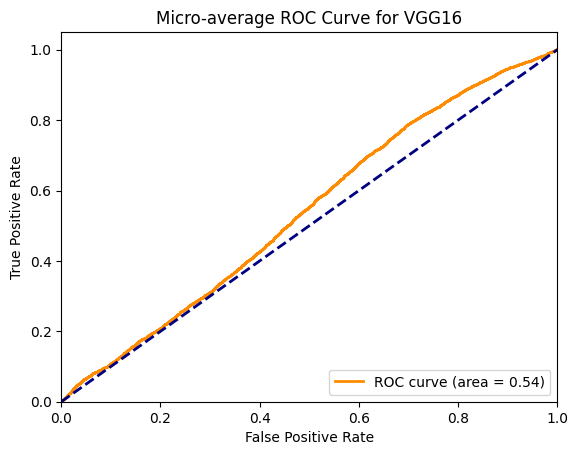

91/91 [==============================] - 3s 27ms/step


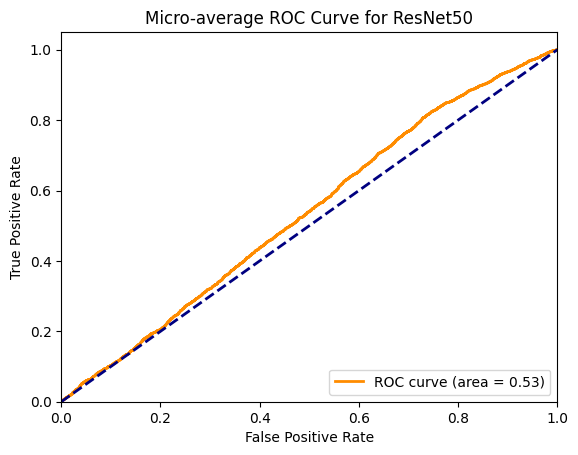

91/91 [==============================] - 2s 26ms/step


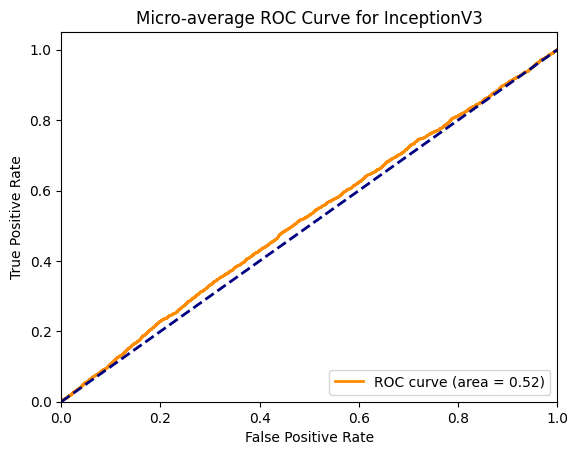

91/91 [==============================] - 3s 28ms/step


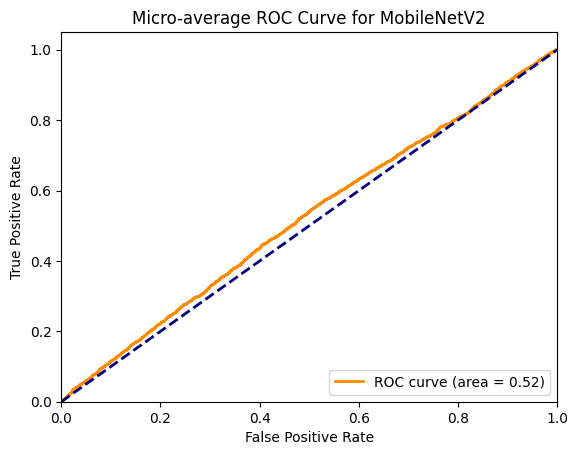

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
import numpy as np

# Define a function to plot micro-average ROC curve for a model
def plot_micro_roc_curve(model, model_name, test_generator):
    y_test = test_generator.classes
    Y_pred = model.predict(test_generator)

    # Binarize the labels
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)

    # Calculate micro-average ROC and AUC
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), Y_pred.ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Micro-average ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Plot micro-average ROC curve for each model
plot_micro_roc_curve(vgg16_model, "VGG16", vgg16_test_generator)
plot_micro_roc_curve(resnet50_model, "ResNet50", resnet50_test_generator)
plot_micro_roc_curve(inceptionv3_model, "InceptionV3", inceptionv3_test_generator)
plot_micro_roc_curve(mobilenetv2_model, "MobileNetV2", mobilenetv2_test_generator)


In [5]:
from sklearn.metrics import average_precision_score
import numpy as np

def calculate_mAP(model, test_generator, model_name):
    y_true = test_generator.classes
    Y_pred = model.predict(test_generator)
    
    # Calculate the Average Precision (AP) for each class
    APs = []
    for class_idx in range(num_classes):
        y_true_class = (y_true == class_idx)
        y_pred_class = Y_pred[:, class_idx]
        ap = average_precision_score(y_true_class, y_pred_class)
        APs.append(ap)
    
    # Calculate the Mean Average Precision (mAP)
    mAP = np.mean(APs)
    
    print(f"Mean Average Precision (mAP) for {model_name}: {mAP:.4f}")

# Calculate mAP for each model
calculate_mAP(vgg16_model, vgg16_test_generator, "VGG16")
calculate_mAP(resnet50_model, resnet50_test_generator, "ResNet50")
calculate_mAP(inceptionv3_model, inceptionv3_test_generator, "InceptionV3")
calculate_mAP(mobilenetv2_model, mobilenetv2_test_generator, "MobileNetV2")


91/91 [==============================] - 2s 27ms/step
Mean Average Precision (mAP) for VGG16: 0.0863
91/91 [==============================] - 3s 29ms/step
Mean Average Precision (mAP) for ResNet50: 0.0851
91/91 [==============================] - 3s 28ms/step
Mean Average Precision (mAP) for InceptionV3: 0.0865
91/91 [==============================] - 3s 28ms/step
Mean Average Precision (mAP) for MobileNetV2: 0.0863


1/1 [==============================] - 0s 51ms/step


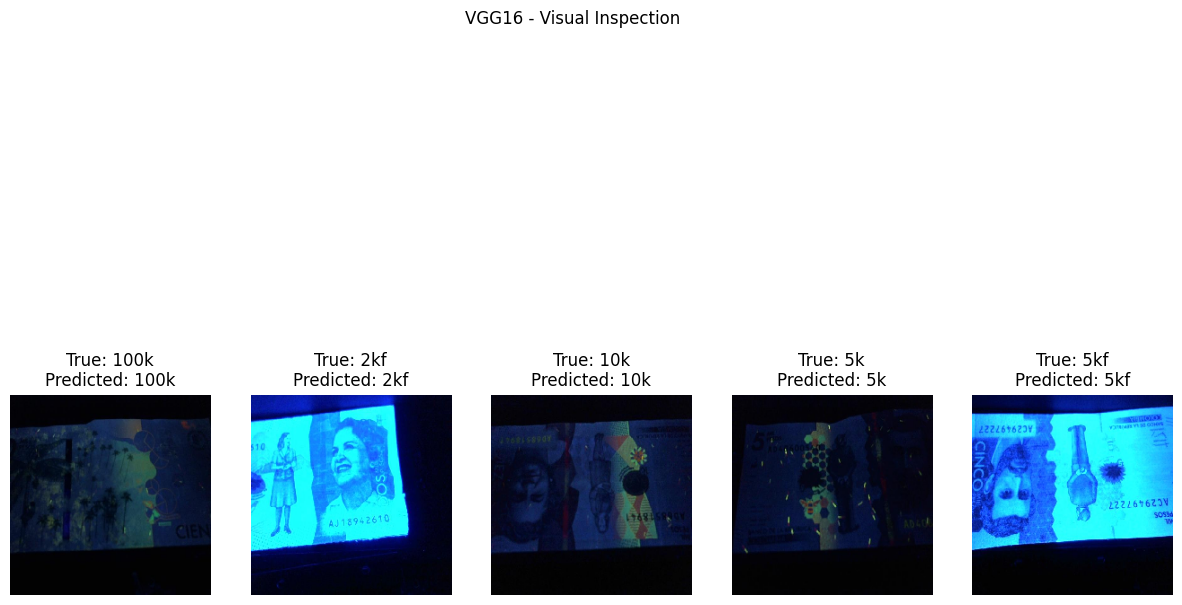

1/1 [==============================] - 0s 295ms/step


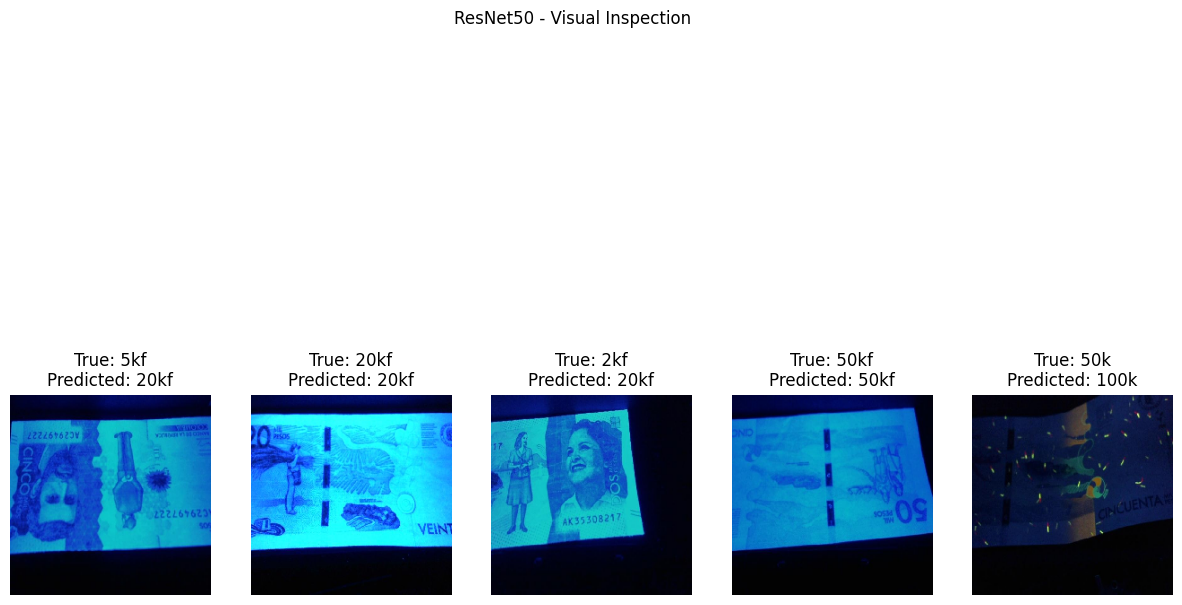

1/1 [==============================] - 0s 396ms/step


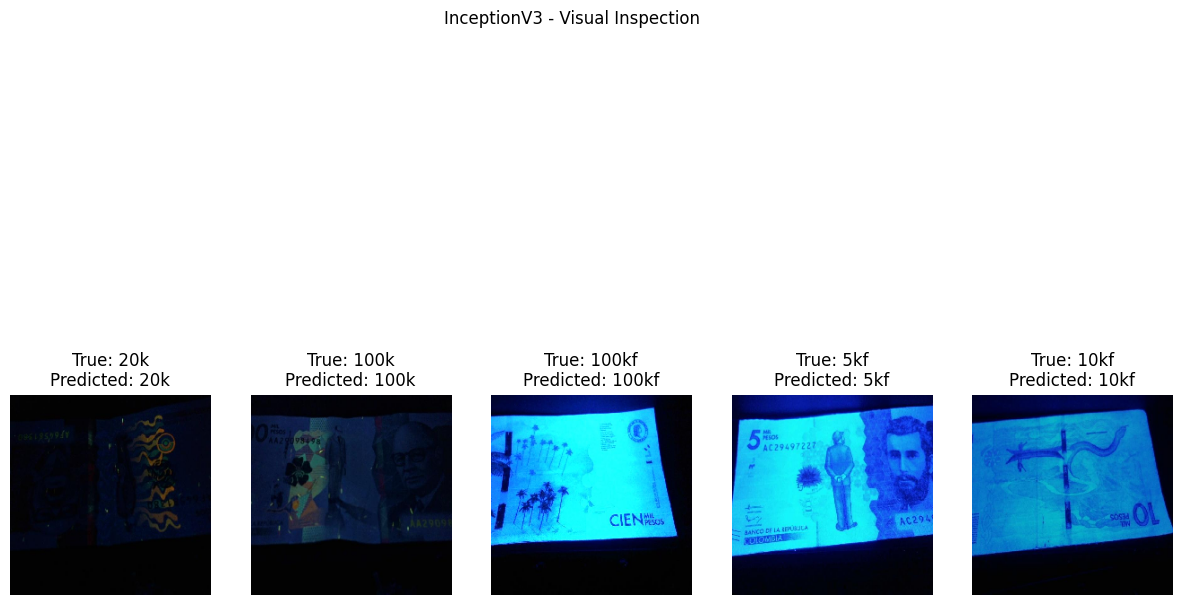

1/1 [==============================] - 0s 261ms/step


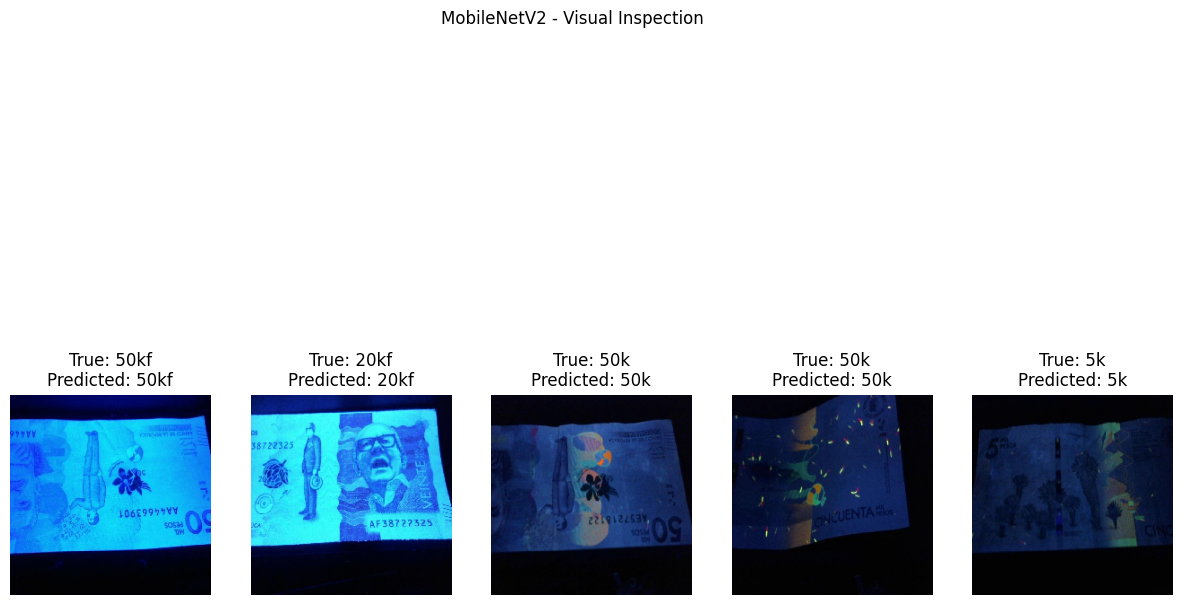

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_predictions(model, model_name, test_generator, num_samples=5):
    # Get a batch of test data and their true labels
    test_images, true_labels = next(test_generator)

    # Get model predictions for the batch
    predicted_labels = model.predict(test_images)

    # Get class labels and indices
    class_labels = test_generator.class_indices
    class_indices = {v: k for k, v in class_labels.items()}

    # Plot the images and their predictions
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(test_images[i])
        true_label = class_indices[np.argmax(true_labels[i])]
        predicted_label = class_indices[np.argmax(predicted_labels[i])]
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
        plt.axis('off')

    plt.suptitle(f'{model_name} - Visual Inspection')
    plt.show()

# Visual inspection for VGG16
visualize_predictions(vgg16_model, "VGG16", vgg16_test_generator)

# Visual inspection for ResNet50
visualize_predictions(resnet50_model, "ResNet50", resnet50_test_generator)

# Visual inspection for InceptionV3
visualize_predictions(inceptionv3_model, "InceptionV3", inceptionv3_test_generator)

# Visual inspection for MobileNetV2
visualize_predictions(mobilenetv2_model, "MobileNetV2", mobilenetv2_test_generator)


In [22]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define your class labels
class_labels = ['100k', '100kf', '10k', '10kf', '50k', '50kf', '5k', '5kf', '20k', '20kf', '2k', '2kf']

# Get predictions from all CNN models
cnn_models = [vgg16_model, resnet50_model, inceptionv3_model, mobilenetv2_model]
predictions = []

for model, test_generator in zip(cnn_models, [vgg16_test_generator, resnet50_test_generator, inceptionv3_test_generator, mobilenetv2_test_generator]):
    model_predictions = get_cnn_predictions(model, test_generator)
    predictions.append(model_predictions)

# Combine predictions
combined_predictions = np.mean(predictions, axis=0)

# Get the class with the majority of votes for each sample
majority_votes = np.argmax(combined_predictions, axis=1)

# Get the true labels for the test data
true_labels = vgg16_test_generator.classes

# Calculate accuracy of majority voting
ensemble_accuracy = accuracy_score(true_labels, majority_votes)
ensemble_cm = confusion_matrix(true_labels, majority_votes)
ensemble_report = classification_report(true_labels, majority_votes, target_names=class_labels)

# Print ensemble model metrics
print("Ensemble majority voting Model Metrics:")
print(f"Ensemble Model Accuracy: {ensemble_accuracy * 100:.2f}%")
print("Majority Voting Confusion Matrix:")
print(ensemble_cm)
print("Majority Voting Classification Report:")
print(ensemble_report)


91/91 [==============================] - 3s 29ms/step
Ensemble majority voting Model Metrics:
Ensemble Model Accuracy: 9.72%
Majority Voting Confusion Matrix:
[[19 10 13 27 10 17 10 35  5 51  5 24]
 [23 23 23 44 16 39 10 42  6 42  5 33]
 [16 15 15 23 15 30  8 23  5 34  5 15]
 [22 28 18 36 16 36 16 44 10 48  9 30]
 [15 17 13 26 16 17  9 22  8 40  4 17]
 [21 25 24 53 13 33  8 43  5 53  6 28]
 [11  7 12 21  5 15  2 20  3 42  2 12]
 [25 31 22 35 15 23  8 39 10 65  6 30]
 [11  6 13 15  6 13  2 14  3 24  0 11]
 [20 11 18 43 14 36  6 49 12 55  5 37]
 [ 8 12 14 20  6 17  7 14  8 20  3 21]
 [23 18 27 34 15 39 11 41 12 46  6 39]]
Majority Voting Classification Report:
              precision    recall  f1-score   support

        100k       0.09      0.08      0.09       226
       100kf       0.11      0.08      0.09       306
         10k       0.07      0.07      0.07       204
        10kf       0.10      0.12      0.10       313
         50k       0.11      0.08      0.09       204
        

In [20]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Create a function to obtain predictions from each CNN model
def get_cnn_predictions(model, test_generator):
    Y_pred = model.predict(test_generator)
    return Y_pred

# Get predictions from all CNN models
vgg16_predictions = get_cnn_predictions(vgg16_model, vgg16_test_generator)
resnet50_predictions = get_cnn_predictions(resnet50_model, resnet50_test_generator)
inceptionv3_predictions = get_cnn_predictions(inceptionv3_model, inceptionv3_test_generator)
mobilenetv2_predictions = get_cnn_predictions(mobilenetv2_model, mobilenetv2_test_generator)

# Concatenate all predictions to create the input features for the ensemble model
ensemble_input_features = np.column_stack((vgg16_predictions, resnet50_predictions, inceptionv3_predictions, mobilenetv2_predictions))

# Split the data into training and testing sets for the ensemble model
X_train, X_test, y_train, y_test = train_test_split(ensemble_input_features, vgg16_test_generator.classes, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
ensemble_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)

# Calculate metrics for the ensemble model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_cm = confusion_matrix(y_test, ensemble_predictions)
ensemble_report = classification_report(y_test, ensemble_predictions, target_names=vgg16_test_generator.class_indices.keys())

# Print ensemble model metrics
print("Ensemble Gradient Boosting Model Metrics:")
print(f"Ensemble Model Accuracy: {ensemble_accuracy * 100:.2f}%")
print("Gradient Boosting Confusion Matrix:")
print(ensemble_cm)
print("Gradient Boosting Classification Report:")
print(ensemble_report)


91/91 [==============================] - 2s 27ms/step
Ensemble Gradient Boosting Model Metrics:
Ensemble Model Accuracy: 7.38%
Gradient Boosting Confusion Matrix:
[[ 3  3  0 11  1  5  1  4  0  6  0 11]
 [ 5  5  3  8  3 12  2  7  0 11  4 14]
 [ 4  1  2  4  1  9  2  8  0  3  0  3]
 [ 4  3  5  6  0 12  2 10  0  6  1 12]
 [ 1  3  3  5  1  8  2  4  1  4  1  4]
 [ 2  6  4  4  4  7  1 14  2 10  3  9]
 [ 1  2  3  4  2  4  2  1  1  4  1  2]
 [ 8  9  1 11  3  5  2  7  1  9  5  4]
 [ 0  1  0  0  1  3  0  5  0  0  0  8]
 [ 4  8  2  6  4 11  4 12  2  4  1  4]
 [ 1  1  2  4  1  2  1  6  0  2  0  8]
 [ 2  6  6  7  6  7  3 10  0  7  3  6]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

        100k       0.09      0.07      0.07        45
       100kf       0.10      0.07      0.08        74
         10k       0.06      0.05      0.06        37
        10kf       0.09      0.10      0.09        61
         50k       0.04      0.03      0.03        37
  